In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import string
import os
import sys
import numpy as np

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data')
fig_dir  = os.path.join(proj_dir,'reports','shallow_melting','figures')
int_dir = os.path.join(data_dir,'analysis','interim')

In [16]:
grid_path = os.path.join(data_dir,'analysis','raw','waom_frc','waom2_grd.nc')
grd = xr.open_dataset(grid_path)

mask_vostock = (grd.lat_rho<-75) & (grd.lat_rho>-80) & (grd.lon_rho>95) & (grd.lon_rho<115)
grd.mask_rho.values[mask_vostock]=0

In [74]:
shelves_path = os.path.join(int_dir,'shelves2_masks.npy')
shelves = np.load(shelves_path,allow_pickle=True).item()

antb_is = np.zeros(grd.mask_rho.shape)

for name,data in shelves.items():
    antb_is[data['mask']]=1

is_masks = np.zeros(grd.mask_rho.shape)

bedmap_is = (grd.mask_rho == 1) & (grd.zice < 0)

is_masks[(bedmap_is == 0) & (antb_is ==0)] = 0
is_masks[(bedmap_is == 1) & (antb_is == 0)] = 1
is_masks[(bedmap_is == 1) & (antb_is == 1)] = 2
is_masks[(grd.mask_rho == 0)] = 3

grd['is_masks'] = xr.DataArray(is_masks,dims={'xi_rho','eta_rho'})

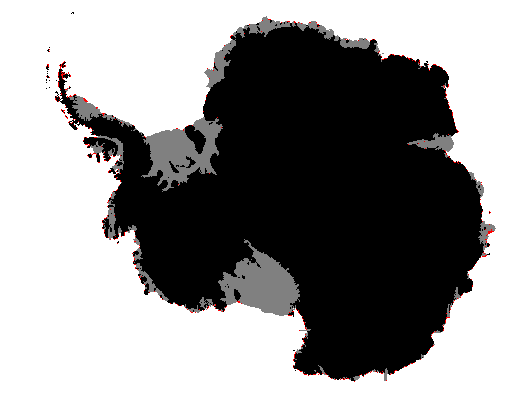

In [136]:
sel = {'xi_rho':slice(132,2900),'eta_rho':slice(250,2500)} #AP

fig,ax = plt.subplots(figsize=(8.27,8.27))

cmap = matplotlib.colors.ListedColormap(['white','red','gray','black'])  
ax.set_aspect('equal')
ax.axis('off')
    
ax.pcolormesh(grd.is_masks.isel(sel),cmap=cmap)

out_path = os.path.join(fig_dir,'difference_in_area_definition.png')
fig.savefig(out_path,format='png',dpi=400,bbox_inches = "tight")

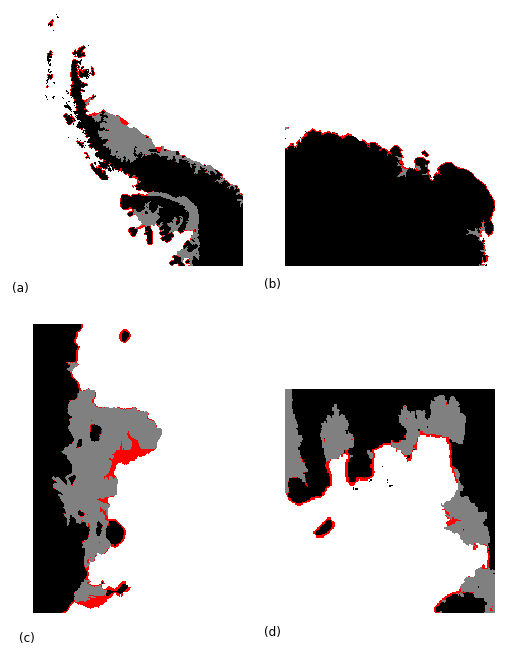

In [138]:
sel1 = {'xi_rho':slice(132,770),'eta_rho':slice(1525,2304)} #AP
sel2 = {'xi_rho':slice(2192,2590),'eta_rho':slice(1983,2382)} #Enderby Land
sel3 = {'xi_rho':slice(2744,2882),'eta_rho':slice(1019,1304)} # West
sel4 = {'xi_rho':slice(574,740),'eta_rho':slice(1045,1222)} # PI

sels = [sel1,sel2,sel3,sel4]

fig,axes = plt.subplots(2,2,figsize=(8.27,11.69))

cmap = matplotlib.colors.ListedColormap(['white','red','gray','black'])

n=0
for sel,ax in zip(sels,axes.flatten()):   
    
    ax.pcolormesh(grd.is_masks.isel(sel),cmap=cmap)  
    ax.set_aspect('equal')
    ax.axis('off')
    
    ax.text(-0.1, -0.1, "("+string.ascii_lowercase[n]+")", transform=ax.transAxes, 
            size=12)
    n+=1
    
    ax.set_anchor('SW')
    
out_path = os.path.join(fig_dir,'difference_in_area_definition_insets.png')
fig.savefig(out_path,format='png',dpi=400,bbox_inches = "tight")